In [ ]:
# 서울 열린데이터 광장 > '서울특별시 공공자전거 대여이력 정보'
# 2024년 1분기 데이터 다운로드 받기(2024.01~03)

1. 일(day)별 자전거 이용건수는 어떻게 될까?
2. 대여시간대별, 요일별 자전거 이용건수는 어떻게 될까?
3. 주말, 평일 이용건수는 어떻게 될까?
4. 인기명소는 어디일까?

In [2]:
import pandas as pd
bikes_temp={}

for i in range(1,4):
    bikes_temp[i] = pd.read_csv(f'D:\kimomin\DataAnalysis\data\서울특별시 공공자전거 대여이력 정보_240{i}.csv', encoding='cp949')

<>:5: SyntaxWarning: invalid escape sequence '\k'
<>:5: SyntaxWarning: invalid escape sequence '\k'
C:\Users\B8-01\AppData\Local\Temp\ipykernel_12432\125298680.py:5: SyntaxWarning: invalid escape sequence '\k'
  bikes_temp[i] = pd.read_csv(f'D:\kimomin\DataAnalysis\data\서울특별시 공공자전거 대여이력 정보_240{i}.csv', encoding='cp949')


In [3]:
for i in range(1,4):
    print(bikes_temp[i].shape)

(2053893, 17)
(2101129, 17)
(3250056, 17)


In [5]:
bikes_temp[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053893 entries, 0 to 2053892
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
dtypes: float64(1), int64(3), object(13)
memory usage: 266.4+ MB


In [12]:
bikes = pd.concat(bikes_temp, ignore_index=True)

In [13]:
bikes.index

RangeIndex(start=0, stop=7405078, step=1)

In [14]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,0.00,2002,M,내국인,ST-2630,ST-850,일반자전거
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,1147.58,1993,NaN,내국인,ST-2654,ST-299,일반자전거
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,642.13,2004,F,내국인,ST-253,ST-1194,일반자전거
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,830.00,\N,M,내국인,ST-533,ST-309,일반자전거
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,791.08,1995,M,내국인,ST-1813,ST-162,일반자전거


In [15]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
dtypes: float64(1), int64(3), object(13)
memory usage: 960.4+ MB


* 날짜 데이터 변경: pd.to_datetime(변수명)
* dt 액세서
    - 변수명.dt.year
    - 변수명.dt.month
    - 변수명.dt.hour
    - 변수명.dt.weekday(요일 0~6 : 월~일) 

In [16]:
# 일자별, 요일별, 주말구분별, 대여시간대별 따릉이 이용건수 파악
# 대여일, 일자, 요일, 대여시간대, 주말구분 컬럼 추가

bikes['대여일'] = pd.to_datetime(bikes['대여일시'])
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 18 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      object        
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
 17  대여일       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(13)
memory usage: 1016.9+ MB


In [17]:
# 월, 일자, 시간대 컬럼 추가
bikes['월'] = bikes['대여일'].dt.month
bikes['일자'] = bikes['대여일'].dt.day
bikes['시간대'] = bikes['대여일'].dt.hour

In [18]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405078 entries, 0 to 7405077
Data columns (total 21 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      object        
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
 17  대여일       datetime64[ns]
 18  월         int32         
 19  일자        int32         
 20  시간대       int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(3), object(13)
memory usage: 1.1+ GB


In [20]:
bikes['요일_n'] = bikes['대여일'].dt.weekday
bikes['요일_n'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [21]:
bikes['요일_n'].value_counts().sort_index()

요일_n
0     977123
1    1088280
2    1173864
3    1147832
4    1146668
5     987407
6     883904
Name: count, dtype: int64

In [121]:
# 요일 컬럼 생성
weekdays = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
bikes['요일'] = bikes['요일_n'].map(weekdays)
bikes['요일'].unique()

array(['월', '화', '수', '목', '금', '토', '일'], dtype=object)

In [122]:
# 주말 구분 열 생성
weekend = {'월':'평일','화':'평일','수':'평일','목':'평일','금':'평일','토':'주말','일':'주말'}
bikes['주말 구분'] = bikes['요일'].map(weekend)
bikes['주말 구분'].value_counts()

주말 구분
평일    5533767
주말    1871311
Name: count, dtype: int64

In [123]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여대여소ID,반납대여소ID,자전거구분,대여일,월,일자,시간대,요일_n,요일,주말 구분
0,SPB-46712,2024-01-01 00:04:10,4804,동서울농협 앞,0,2024-01-01 00:05:13,01416,상봉역 3번출구,0,1,...,ST-2630,ST-850,일반자전거,2024-01-01 00:04:10,1,1,0,0,월,평일
1,SPB-35089,2024-01-01 00:00:10,4169,신대방삼거리,0,2024-01-01 00:06:23,00251,서울지방병무청 버스정류장,0,6,...,ST-2654,ST-299,일반자전거,2024-01-01 00:00:10,1,1,0,0,월,평일
2,SPB-36386,2024-01-01 00:03:13,540,군자역 7번출구 베스트샵 앞,0,2024-01-01 00:06:33,03509,세종사이버대학교,0,3,...,ST-253,ST-1194,일반자전거,2024-01-01 00:03:13,1,1,0,0,월,평일
3,SPB-61278,2024-01-01 00:02:42,1139,용문사 버스정류장,0,2024-01-01 00:07:24,00701,목동사거리 부근,0,4,...,ST-533,ST-309,일반자전거,2024-01-01 00:02:42,1,1,0,0,월,평일
4,SPB-36848,2024-01-01 00:03:02,3416,동묘앞역 6번출구,0,2024-01-01 00:07:33,00346,맥스타일 앞,0,4,...,ST-1813,ST-162,일반자전거,2024-01-01 00:03:02,1,1,0,0,월,평일


* 일자별 따릉이 이용건수

In [124]:
# 1월 일자별 대여현황
daily_ride_01 = bikes.query('월==1').groupby('일자', as_index=False)['자전거번호'].count()
daily_ride_01.head()

,일자,자전거번호
0,1,48927
1,2,89691
2,3,74474
3,4,93416
4,5,97979


Text(0.5, 1.0, '2024년 1월 일자별 현황')

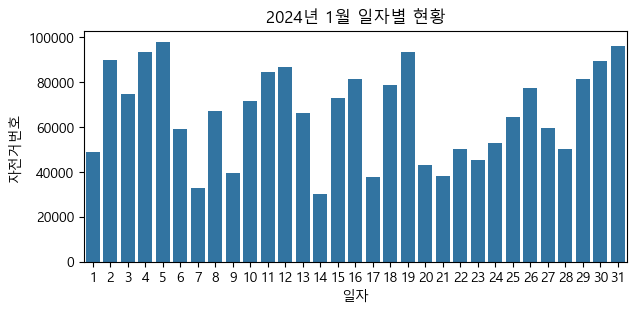

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(7,3))
sns.barplot(data=daily_ride_01, x='일자', y='자전거번호')
plt.title('2024년 1월 일자별 현황')

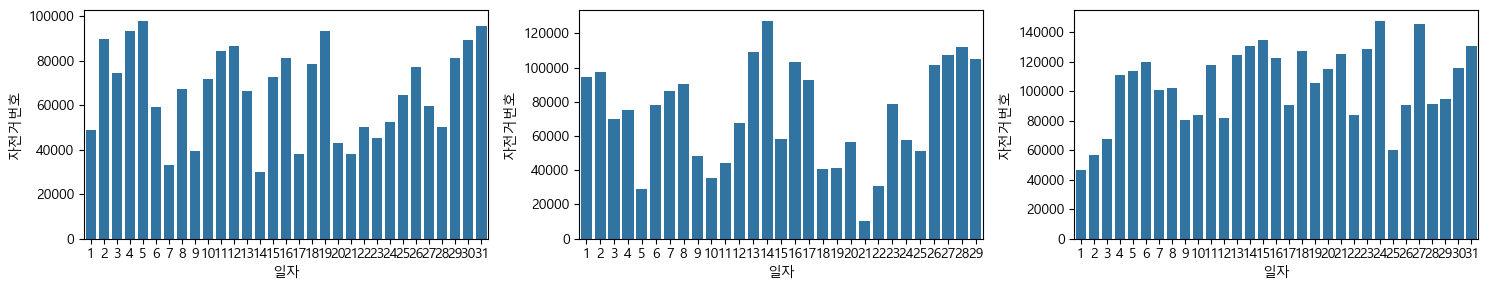

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

daily_ride_01 = bikes.query('월==1').groupby('일자', as_index=False)['자전거번호'].count()
daily_ride_02 = bikes.query('월==2').groupby('일자', as_index=False)['자전거번호'].count()
daily_ride_03 = bikes.query('월==3').groupby('일자', as_index=False)['자전거번호'].count()

fig, axes = plt.subplots(1,3,figsize=(15,3))

sns.barplot(data=daily_ride_01, x='일자', y='자전거번호', ax=axes[0])
sns.barplot(data=daily_ride_02, x='일자', y='자전거번호', ax=axes[1])
sns.barplot(data=daily_ride_03, x='일자', y='자전거번호', ax=axes[2])

plt.tight_layout()
plt.show()


In [127]:
# 대여시간대별 따릉이 이용건수
hourly_ride = bikes.groupby('시간대',as_index=False)[['자전거번호']].count()

In [137]:
# 요일별 따릉이 인원수
weekly_ride = bikes.groupby('요일',as_index=False)[['자전거번호']].count()

In [138]:
weekly_ride

,요일,자전거번호
0,금,1146668
1,목,1147832
2,수,1173864
3,월,977123
4,일,883904
5,토,987407
6,화,1088280


In [139]:
weekday_ride = bikes.groupby('주말 구분',as_index=False)[['자전거번호']].count()

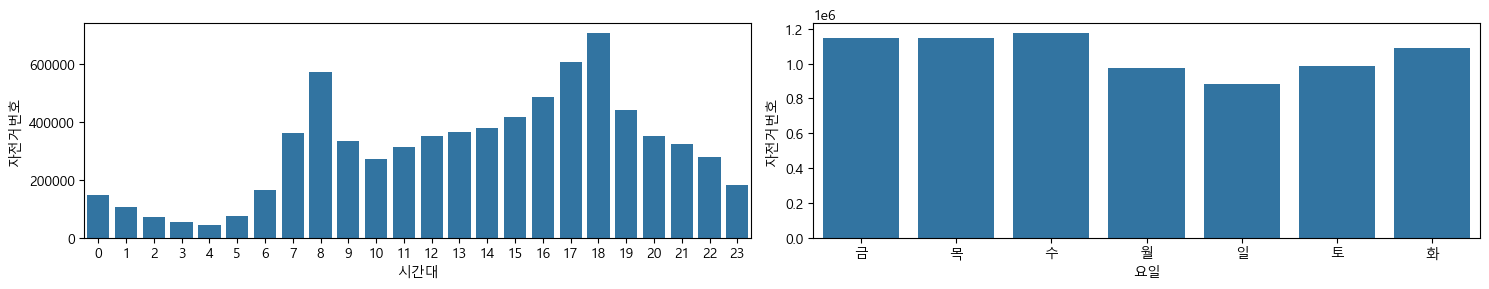

In [140]:
fig, axes = plt.subplots(1,2,figsize=(15,3))

sns.barplot(data=hourly_ride, x='시간대', y='자전거번호', ax=axes[0])
sns.barplot(data=weekly_ride, x='요일', y='자전거번호', ax=axes[1])

plt.tight_layout()
plt.show()

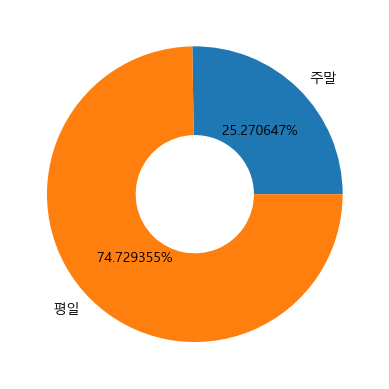

In [141]:
plt.pie(weekday_ride['자전거번호'],labels=weekday_ride['주말 구분'],autopct='% 1f%%', wedgeprops={'width':0.6})
plt.show()

In [118]:
# 대여시간대별 & 요일별 이용건수

hourly_weekday_ride = bikes.groupby(['시간대','요일'],as_index=False)[['자전거번호']].count()
hourly_weekday_ride.head()

,시간대,요일,자전거번호
0,0,금,23351
1,0,목,20715
2,0,수,20657
3,0,월,15891
4,0,일,24562


<Axes: xlabel='시간대', ylabel='자전거번호'>

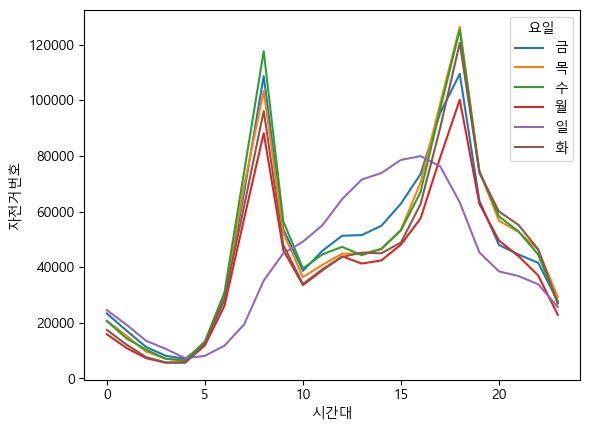

In [119]:
sns.lineplot(data=hourly_weekday_ride, x='시간대', y='자전거번호', hue='요일')

In [143]:
hourly_weekday_ride2 = bikes.pivot_table(index='시간대',columns='요일',values='자전거번호',aggfunc='count')

# 열 순서를 지정하여 재정열
hourly_weekday_ride2 = hourly_weekday_ride2.reindex(columns=['월','화','수','목','금','토','일'])
hourly_weekday_ride2

요일,월,화,수,목,금,토,일
시간대,,,,,,,
0,15891,17445,20657,20715,23351,24562,23361
1,10968,12197,14435,15369,17204,19326,16545
2,7293,7679,10355,9649,11316,13558,12211
3,5661,5773,7070,7143,8168,10661,8525
4,5823,5667,6533,6301,7037,7268,5884
5,11864,12452,13316,12380,12646,8138,5389
6,26191,28854,31027,29267,28336,11822,7786
7,57457,61946,74315,69323,66935,19417,13271
8,88228,96193,117672,103379,108701,35210,23574


<Axes: xlabel='요일', ylabel='시간대'>

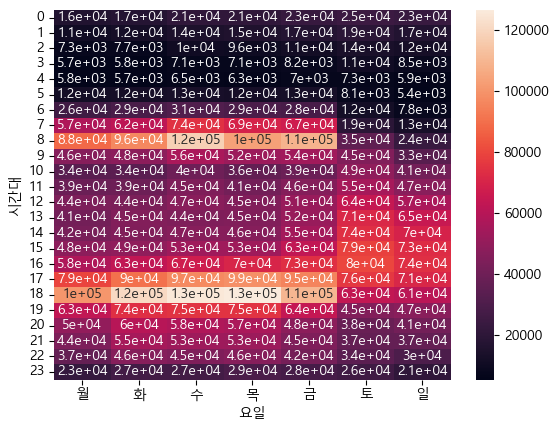

In [144]:
plt.Figure(figsize=(10,8))
sns.heatmap(data=hourly_weekday_ride2,annot=True)

In [145]:
hourly_weekday_ride3 = bikes.groupby(['시간대','요일'],as_index=False)[['자전거번호']].count().unstack()
hourly_weekday_ride3

시간대    0          0
       1          0
       2          0
       3          0
       4          0
              ...  
자전거번호  163    26951
       164    22879
       165    20985
       166    25736
       167    27074
Length: 504, dtype: object

 # 인기 있는 대여소 top50
* 주말, 평일
* 데이터 다운로드 및 편집
     - data.seoul.go.kr > 서울특별시 공공데이터

In [102]:
bikes_weekend = bikes.groupby(['대여 대여소번호', '대여 대여소명', '주말 구분'])['자전거번호'].count().unstack()
# [[자전거번호]]라고 하면 '자전거번호'행이 가장 위에 생김

In [105]:
weekend50 = bikes_weekend.sort_values('주말',ascending=False).head(50).reset_index()

In [114]:
bike_shop = pd.read_csv('D:\kimomin\DataAnalysis\data\공공자전거 대여소 정보.csv', encoding='cp949')
bike_shop

<>:1: SyntaxWarning: invalid escape sequence '\k'
<>:1: SyntaxWarning: invalid escape sequence '\k'
C:\Users\B8-01\AppData\Local\Temp\ipykernel_12432\953974627.py:1: SyntaxWarning: invalid escape sequence '\k'
  bike_shop = pd.read_csv('D:\kimomin\DataAnalysis\data\공공자전거 대여소 정보.csv', encoding='cp949')


,대여소\n번호,보관소(대여소)명,자치구,상세주소,위도,경도
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100
...,...,...,...,...,...,...
2761,4954,신명초등학교 건너편,강동구,강동구 천호대로201길,37.540043,127.150742
2762,4956,암사역사공원역 1번출구,강동구,강동구 고덕로27길 36,37.557568,127.140160
2763,4957,신명초교 교차로,강동구,강동구 길동 158-8,37.540436,127.148399
2764,4958,고덕래미안힐스테이트 아파트 211동,강동구,강동구 고덕동 490,37.559494,127.145126
